**Predicted purchased decision of a customer based on salary and age parameter**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# import dataset
dataset=pd.read_csv('/content/drive/MyDrive/Dataset/Social_Network_Ads.csv')
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [ ]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)


In [ ]:
# Features scaling (optional): in order to improve the performance
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)



Training the Logistic regression model on Training set 

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)




LogisticRegression(random_state=0)

Predict the Test set result


In [ ]:
Y_pred=classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))



[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


**Apply K-fold cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(classifier,X_train, Y_train,cv=3,scoring='accuracy')
# Score of K-fold cross validation
a.mean()


0.8284253218127314

In [ ]:
# Cross validation prediction
from sklearn.model_selection import cross_val_predict
c_y_pred=cross_val_predict(classifier, X_train,Y_train,cv=3)


In [ ]:
# c_y_train_pred

In [ ]:
# Confusion Matrix with cross validation
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_train,c_y_pred)
print(cm)

[[183  16]
 [ 39  82]]


In [ ]:
# Accuracy with Cross Validation
from sklearn.metrics import accuracy_score
accuracy_score(Y_train,c_y_pred)

0.828125

**Result Without Cross Validation**

In [ ]:
# Confusion Matrix without Cross Validation
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[57  1]
 [ 5 17]]


In [ ]:
# Accuracy without Cross Validation
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.925

**Precision, Recall and F1 score**

In [ ]:
from sklearn.metrics import precision_score , recall_score, f1_score
# Precision Score
precision_score(Y_test,Y_pred)


0.9444444444444444

In [ ]:
# Recall Score
recall_score(Y_test, Y_pred)


0.7727272727272727

In [ ]:
# F1 Score
f1_score(Y_test, Y_pred)


0.85

**Precision, Recall curve**

In [ ]:
from sklearn.metrics import precision_recall_curve
# For thershold value
y_score=cross_val_predict(classifier,X_train, Y_train,cv=3, method="decision_function")

In [ ]:
y_score

array([ 5.35575751,  3.95564706, -4.41327781, -4.5079857 ,  2.54414594,
        0.17190185, -0.39650619,  5.20230502,  0.00901071, -0.57648333,
       -0.25249235,  0.83306578, -4.8168427 , -4.7789274 , -3.64406332,
       -2.67209038, -4.41897313,  0.23259847,  1.7445028 ,  0.80849315,
       -0.47982343, -0.94603694, -1.49540699, -0.54816738,  0.78587253,
        3.20530987, -1.48971166, -1.20363598, -1.93119185, -1.58637156,
       -2.81220021, -2.14908427, -0.01377061,  0.43910024,  2.52331663,
        1.29927929,  2.17833565, -1.98619313,  1.09652084,  0.49214951,
       -5.03847845,  4.6775076 ,  0.14912054,  0.45228221, -0.54426336,
       -1.91036254,  0.44479556,  2.91158685,  0.17564517, -0.85702438,
       -5.03847845,  3.08602935, -5.36816475,  2.00210184,  1.46786577,
       -3.43560954, -0.05738123, -2.63987042, -0.25818768, -0.60675128,
       -2.08090102, -4.56868231, -2.38406269,  0.17190185, -1.56554225,
        0.04106998, -0.50260474,  3.88355979,  1.01694693, -1.48

In [ ]:
precision,recall,thersholds = precision_recall_curve(Y_train, y_score)

In [ ]:
precision

array([0.48207171, 0.48      , 0.48192771, 0.48387097, 0.48582996,
       0.48780488, 0.48979592, 0.49180328, 0.49382716, 0.49586777,
       0.49792531, 0.5       , 0.50209205, 0.50420168, 0.50632911,
       0.50847458, 0.5106383 , 0.51282051, 0.51502146, 0.51724138,
       0.51948052, 0.52173913, 0.52401747, 0.52631579, 0.52863436,
       0.53097345, 0.53333333, 0.53571429, 0.53811659, 0.54054054,
       0.54298643, 0.54545455, 0.54794521, 0.55045872, 0.55299539,
       0.55555556, 0.55813953, 0.56074766, 0.56338028, 0.56603774,
       0.56398104, 0.56666667, 0.56937799, 0.57211538, 0.57487923,
       0.5776699 , 0.5804878 , 0.58333333, 0.5862069 , 0.58910891,
       0.595     , 0.59798995, 0.6010101 , 0.60406091, 0.60714286,
       0.61025641, 0.61340206, 0.61658031, 0.61979167, 0.61780105,
       0.62105263, 0.62433862, 0.62765957, 0.63101604, 0.6344086 ,
       0.63243243, 0.63934426, 0.64285714, 0.64088398, 0.64444444,
       0.64804469, 0.65168539, 0.65536723, 0.65340909, 0.65142

In [ ]:
recall

array([1.        , 0.99173554, 0.99173554, 0.99173554, 0.99173554,
       0.99173554, 0.99173554, 0.99173554, 0.99173554, 0.99173554,
       0.99173554, 0.99173554, 0.99173554, 0.99173554, 0.99173554,
       0.99173554, 0.99173554, 0.99173554, 0.99173554, 0.99173554,
       0.99173554, 0.99173554, 0.99173554, 0.99173554, 0.99173554,
       0.99173554, 0.99173554, 0.99173554, 0.99173554, 0.99173554,
       0.99173554, 0.99173554, 0.99173554, 0.99173554, 0.99173554,
       0.99173554, 0.99173554, 0.99173554, 0.99173554, 0.99173554,
       0.98347107, 0.98347107, 0.98347107, 0.98347107, 0.98347107,
       0.98347107, 0.98347107, 0.98347107, 0.98347107, 0.98347107,
       0.98347107, 0.98347107, 0.98347107, 0.98347107, 0.98347107,
       0.98347107, 0.98347107, 0.98347107, 0.98347107, 0.97520661,
       0.97520661, 0.97520661, 0.97520661, 0.97520661, 0.97520661,
       0.96694215, 0.96694215, 0.96694215, 0.95867769, 0.95867769,
       0.95867769, 0.95867769, 0.95867769, 0.95041322, 0.94214

In [ ]:
thersholds

array([-2.67209038, -2.63987042, -2.62743297, -2.60484838, -2.58145036,
       -2.57840095, -2.47193746, -2.4636366 , -2.44085529, -2.43752104,
       -2.4372165 , -2.42108261, -2.39390891, -2.38406269, -2.30888842,
       -2.27008494, -2.25272446, -2.22764317, -2.20345897, -2.16767319,
       -2.16421825, -2.14908427, -2.1287133 , -2.11154002, -2.1057753 ,
       -2.08273069, -2.08090102, -2.05392136, -1.99039107, -1.98619313,
       -1.97303059, -1.93849683, -1.93119185, -1.92704798, -1.91036254,
       -1.8838379 , -1.86637991, -1.85731326, -1.82625377, -1.73803274,
       -1.59206689, -1.58637156, -1.56554225, -1.56092611, -1.55215228,
       -1.53705856, -1.50903188, -1.49643594, -1.49540699, -1.48971166,
       -1.48596834, -1.47032383, -1.46888235, -1.43386554, -1.40238119,
       -1.38715067, -1.3821585 , -1.3590736 , -1.34652805, -1.3390381 ,
       -1.2726456 , -1.27204755, -1.26807591, -1.22658808, -1.21697864,
       -1.20363598, -1.1908023 , -1.18280667, -1.18112862, -1.16

**Plot Precision Recall Curve**

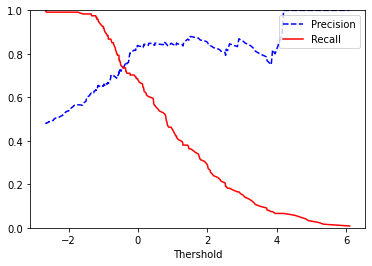

In [ ]:
plt.plot(thersholds, precision[:-1], "b--", label="Precision")
plt.plot(thersholds, recall[:-1], "r-", label="Recall")
plt.xlabel("Thershold")
plt.legend(loc='upper right')
plt.ylim([0,1])
plt.show()